# ⚽ Football Player Segmentation (2025)


**📌 Project Overview**

This project applies unsupervised machine learning to group professional football players based on attributes such as skill level, market value, wages, and age. Using a custom implementation of the KMeans clustering algorithm, we aim to identify patterns and similarities between players without any prior labels. This approach can help scouts, analysts, and managers explore player categories for decision-making.



📊 **Dataset**

The dataset is sourced from the FIFA player database and includes a wide range of player features. For clustering purposes, we selected the following numerical attributes:

**overall** – Player's overall rating

**potential** – Predicted maximum rating

**value_eur** – Market value in Euros

**wage_eur** – Weekly wage

**age** – Player's age


⚙️ **Clustering Process**

Instead of using built-in libraries, we implemented KMeans from scratch to understand the algorithm in depth.               
steps:

🎲 **Random Initialization:**
Centroids are initialized by randomly sampling values from the dataset, ensuring realistic starting points.

🎯 **Assignment Step:**
Each player is assigned to the nearest centroid based on Euclidean distance.

🔁 **Update Step:**
New centroids are calculated using the geometric mean of points in each cluster (more stable for normalized data).

**📉 Iteration & Visualization:**
The process repeats until centroids stabilize or max iterations are reached. We used PCA to reduce the feature space to 2D and visualize the clustering process dynamically.




📉 **Dimensionality Reduction for Visualization**

To visualize player clusters, we used **Principal Component Analysis (PCA)** to reduce the 5D feature space to 2D. This allows us to observe how players are grouped based on underlying similarities.


📈 **Key Observations**

✅ Players with high overall and potential ratings tend to cluster together, typically reflecting elite players.

✅ Low-value, low-wage players form distinct groups, likely representing younger or less experienced players.

✅ Market value and wages are highly correlated and often dominate the clustering behavior.



📁 **Dataset**

The dataset used is publicly available on Kaggle:


##### **https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset**

👩‍💻 **Author & Contact**

📌 Project by: Nazanin Mahmoudy, 2025                         
📧 Email: Nazaninmahmoudy@gmail.com                                        
🔗 GitHub: https://github.com/Nazaninmahmoudi                                    
🔗 Kaggle: https://www.kaggle.com/nazaninmahmoudy                                             

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/fifa-22-complete-player-dataset/players_21.csv")


In [3]:
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


## Cleaning Data

In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]


In [5]:
df = df.dropna(subset=features)


In [6]:
data = df[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,560000.0,103500000.0,33
1,92,92,220000.0,63000000.0,35
2,91,91,240000.0,111000000.0,31
3,91,91,270000.0,132000000.0,28
4,91,91,370000.0,129000000.0,29
...,...,...,...,...,...
18939,47,52,1000.0,70000.0,21
18940,47,53,1000.0,70000.0,21
18941,47,47,2000.0,45000.0,28
18942,47,67,500.0,130000.0,17


## Data Scaling: Min-Max Normalization from 1 to 10

In [7]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

Starting from 1 ensures all feature values are positive and non-zero, which helps prevent issues in algorithms that may treat zero as a special case. This also makes interpretation easier when using the scaled values as scores or ratings.





In [8]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,18707.000000,18707.000000,18707.000000,18707.000000,18707.000000
mean,4.645885,5.517380,1.139170,1.140382,4.055683
std,1.370512,1.146006,0.320085,0.375727,1.554539
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.750000,1.008043,1.022610,2.666667
50%,4.717391,5.500000,1.040214,1.046870,4.000000
75%,5.500000,6.250000,1.120643,1.096603,5.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


As we can see, our data has been scaled to the range of 1 to 10

## Visualization 

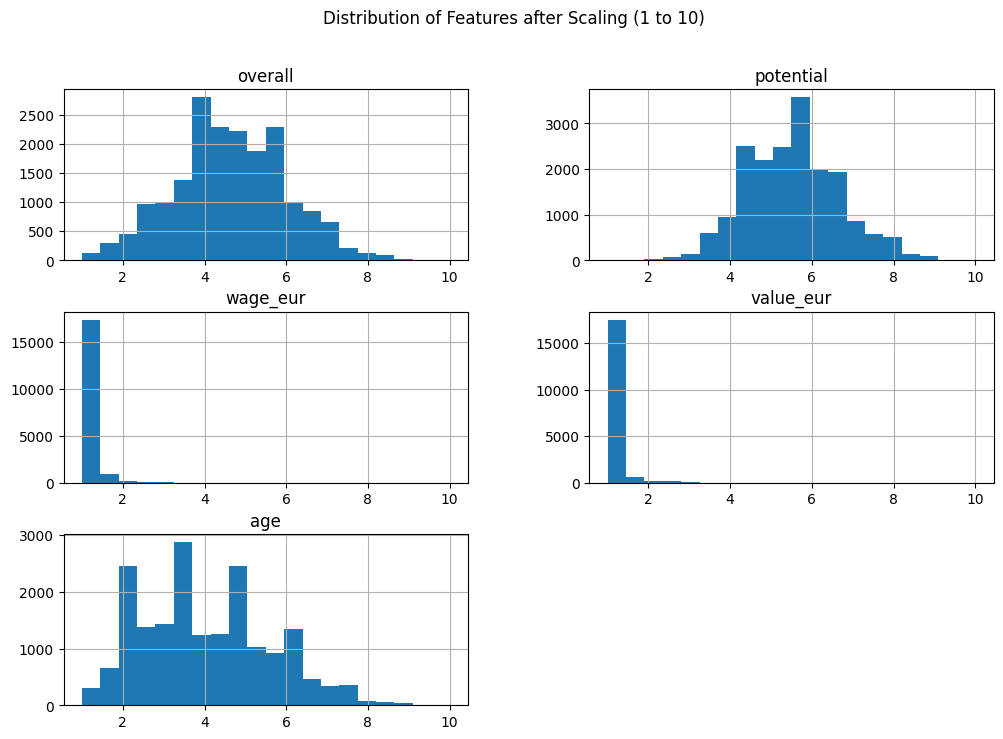

In [9]:
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Features after Scaling (1 to 10)")
plt.show()


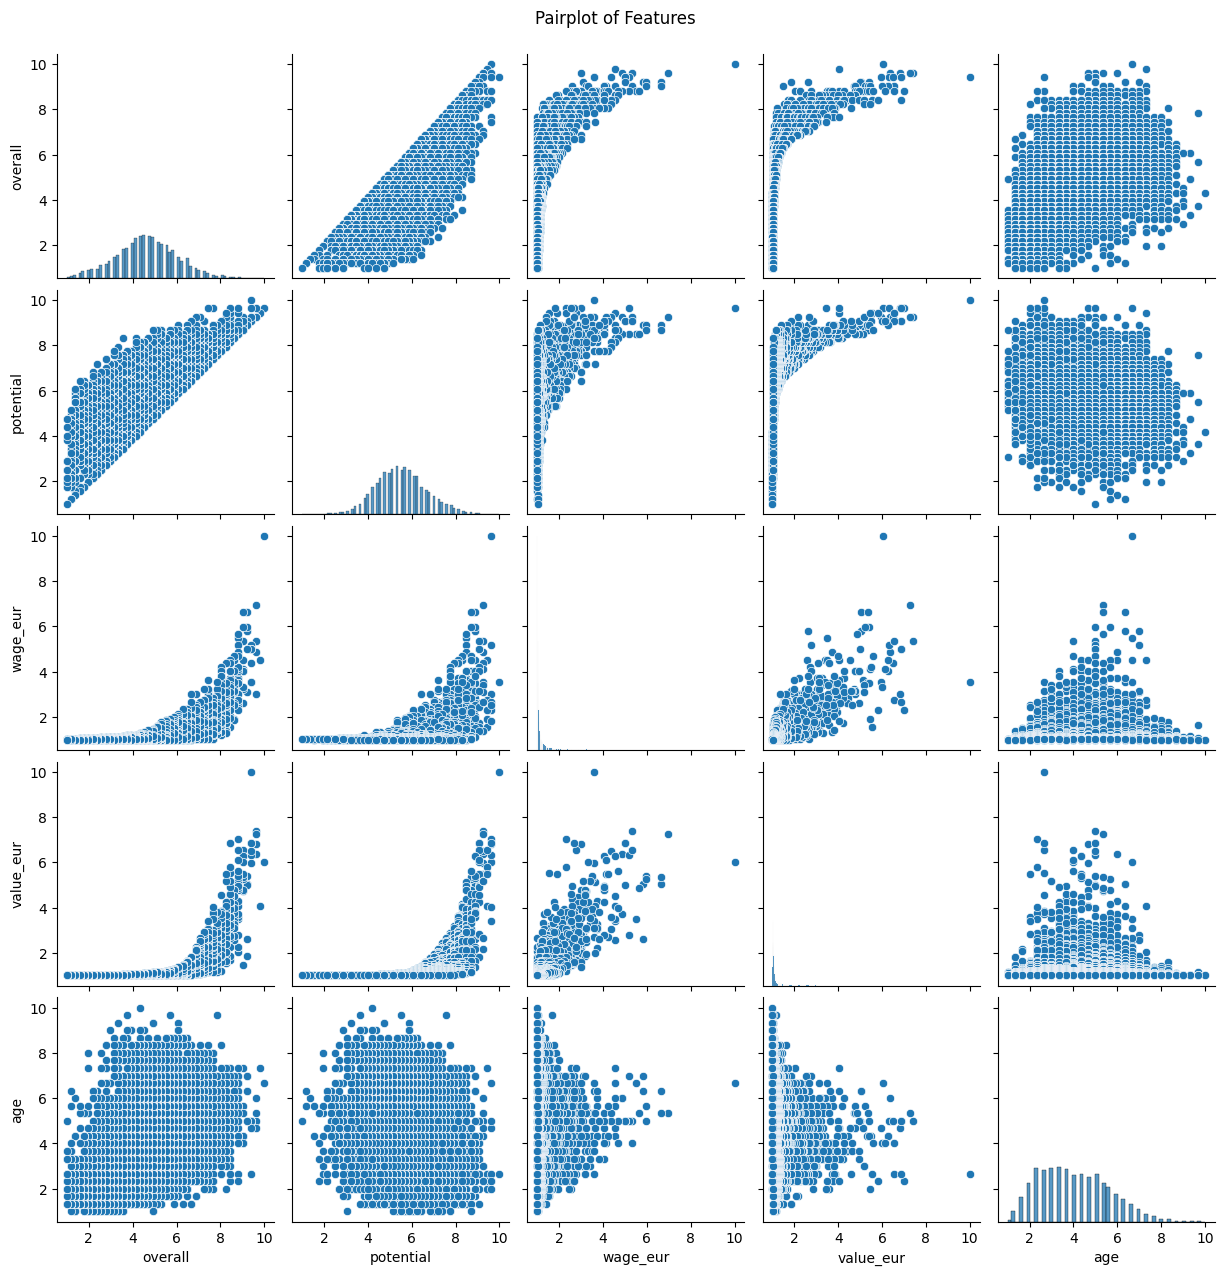

In [10]:
import seaborn as sns
sns.pairplot(data)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


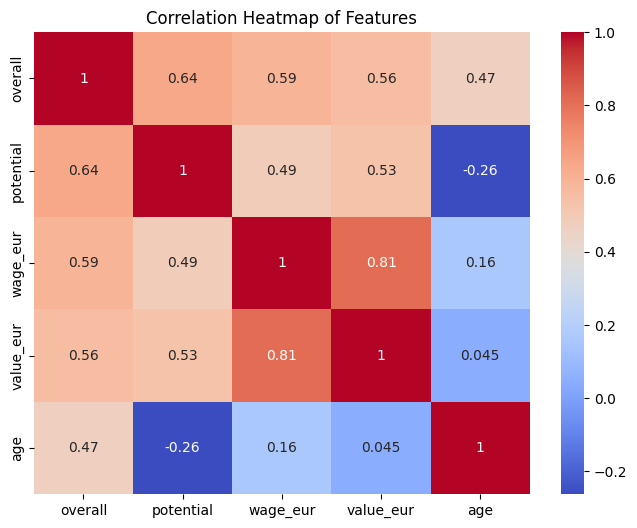

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


## initializing randome centeirs 

In [12]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [13]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,5.695652,4.717391,3.152174,2.565217,4.130435
potential,5.125000,8.125000,3.250000,4.187500,6.250000
wage_eur,1.410188,1.008043,1.024129,1.000000,1.004826
value_eur,1.057787,1.016545,1.015332,1.116011,1.006841
age,2.666667,6.000000,2.666667,1.333333,4.000000


This function generates k random initial centroids for clustering by randomly sampling a value from each feature column in the dataset. Each centroid is a vector of feature values taken directly from the data, which helps initialize clustering algorithms with realistic starting points.

The number k represents how many clusters we want to identify.

## Assigning Data Points to Nearest Centroids

In [14]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

This function calculates the Euclidean distance between each data point and all centroids. Then, it assigns each data point to the cluster of its nearest centroid by choosing the minimum distance. The function returns a label for every data point indicating its cluster membership.

In [15]:
labels = get_labels(data, centroids)
labels.value_counts()


4    10931
3     2014
1     1962
0     1916
2     1884
Name: count, dtype: int64

## Calculating Cluster Centers Using Geometric Mean

In [16]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

This function updates cluster centroids based on labels. For each cluster, it calculates the geometric mean of the data points belonging to that cluster across all features. The geometric mean is used here instead of the usual arithmetic mean because it can be more appropriate for data that has been scaled or follows multiplicative patterns.

## KMeans Clustering with Visualization

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [18]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels, cmap='tab10', marker='s', alpha=0.7, edgecolor='k', s=60)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], c='black', marker='*', s=200, edgecolor='yellow', linewidth=1.5)
    
    plt.show()


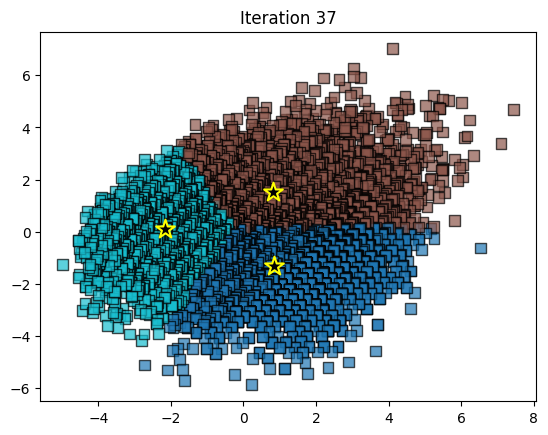

In [19]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

The process of implementation starts by randomly selecting a set of initial centroids. Then, in every iteration, it assigns each data point to the nearest centroid based on Euclidean distance. After that, it updates the centroids by calculating the geometric mean of all points assigned to each cluster.


We reduce the data to **2D with PCA** so we can visualize high-dimensional clusters in a simple, understandable plot.

To visualize the clusters in two dimensions, the data and centroids are projected down to 2D using **PCA**. The scatter plot of data points and centroids is updated every iteration to reflect the current clustering.

In [20]:
labels.value_counts()


0    7065
2    6224
1    5418
Name: count, dtype: int64

In [21]:
df[labels == 0][["short_name"] + features]


,short_name,overall,potential,wage_eur,value_eur,age
212,G. Buffon,82,82,41000.0,3400000.0,42
273,Pepe,81,81,13000.0,4600000.0,37
366,A. Robben,80,80,12000.0,7000000.0,36
367,Joaquín,80,80,22000.0,7000000.0,38
372,F. Quagliarella,80,80,22000.0,7000000.0,37
...,...,...,...,...,...,...
18805,A. Foley,50,50,500.0,45000.0,30
18852,Gao Xiang,49,49,2000.0,40000.0,31
18885,L. Walker,48,48,1000.0,30000.0,30
18917,Wang Jianwen,48,48,2000.0,35000.0,32


Selects all players assigned to cluster 0 and displays their names along with selected features for further analysis.



In [22]:
df[labels == 1][["short_name"] + features]


,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,560000.0,103500000.0,33
1,Cristiano Ronaldo,92,92,220000.0,63000000.0,35
2,R. Lewandowski,91,91,240000.0,111000000.0,31
3,Neymar Jr,91,91,270000.0,132000000.0,28
4,K. De Bruyne,91,91,370000.0,129000000.0,29
...,...,...,...,...,...,...
11832,R. Ladinetti,64,82,4000.0,1500000.0,19
12645,K. Hoever,63,84,4000.0,1500000.0,18
12875,L. Netz,63,86,500.0,1500000.0,17
12893,L. Pirola,63,84,4000.0,1500000.0,18


 ## Comparing out results with K_Means library  

In [23]:
from sklearn.cluster import KMeans

### Training the model 

In [24]:
kmeans = KMeans(3)
kmeans.fit(data)


KMeans(n_clusters=3)

In [25]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T


,0,1,2
overall,3.512046,4.784151,6.220780
potential,5.396813,4.740501,6.776207
wage_eur,1.024407,1.075780,1.405265
value_eur,1.035284,1.042335,1.439210
age,2.693375,5.543619,4.125535


Creates a DataFrame showing the coordinates of each cluster center from the KMeans model, with features as rows and clusters as columns.

In [26]:
centroids


,0,1,2
overall,4.744831,5.878222,3.183154
potential,4.725948,6.675603,5.208229
wage_eur,1.078243,1.290636,1.019006
value_eur,1.046098,1.315707,1.028199
age,5.413344,3.677593,2.508950


## Conclusion

The similarity between the centroids generated by our custom method and those from the standard KMeans algorithm indicates that our implementation effectively captures the underlying data structure.

This validates our approach to initializing and updating cluster centers using random sampling and geometric means. The consistent results also demonstrate the stability and reliability of our clustering method.

